# Check Sets Train, Val, Test distribution

Select the file *.txt* that contains all the images and its size. Now we want to check the distribution 

In [1]:
from enum import Enum
etiqueta = Enum('etiqueta', ["location", "fruta", "variedad", "tamaño", "plato", "luz", "plano", "angulo"], start=0)

traduccion_etiqueta = { "Rio": "Rioja",
                        "Mad": "Madrid",

                        "M": "Manzana",
                        "P": "Pera",
                        "N": "Naranja",
                        "PL": "Platano",

                        "Fuji": "Fuji",
                        "Golden": "Golden",
                        "Granny Smith": "Granny Smith",

                        "Spb": ["Sin_Plato", "Blanco"],
                        "Spo": ["Sin_Plato", "Oscuro"],
                        "Spm": ["Sin_Plato", "Mantel"],
                        "Ppb": ["Postre", "NULL"],
                        "Pgb": ["Grande", "NULL"],

                        "int": "Interior",
                        "ext": "Exterior",

                        "al": "Alejado",
                        "me": "Medio",
                        "ce": "Cercano",

                        "sup": "Superior",
                        "cen": "Central",
                        "ver": "Vertical"}


In [2]:
def get_bin(true_values):
    
    grams = [100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375]
    bins = [87.5, 112.5, 137.5, 162.5, 187.5, 212.5, 237.5, 262.5, 287.5, 312.5, 337.5, 362.5, 387.5]
    
    
    if type(true_values) == list:
        result = list()
        for e in true_values:
            l = len(bins)
            index = 0
            for i in range(l):
                try:
                    if bins[i] < float(e) and bins[i+1] > float(e):
                        index = i
                        result.append(grams[index])
                        break
                except:
                    print("Error:", e)
    else:
        l = len(bins)
        index = 0
        for i in range(l):
            try:
                if bins[i] < float(true_values) and bins[i+1] > float(true_values):
                    index = i
                    result = grams[index]
                    break
            except:
                print("Error:", true_values)
        
    
    return result

def get_images_info(path):
    
    f = path
    splited = path[0:-4].split('_') #Separamos por barraBaja, quitando .JPG
    splited[0] = splited[0].split('/')[-1]
    #print(splited)
    #Recopilar informacion imagen
    
    location = traduccion_etiqueta[splited[etiqueta.location.value]]
    fruta = traduccion_etiqueta[splited[etiqueta.fruta.value]]
    variedad = traduccion_etiqueta[splited[etiqueta.variedad.value]]
    tamaño = splited[etiqueta.tamaño.value].replace(',','.')
    luz = traduccion_etiqueta[splited[etiqueta.luz.value]]
    plano = traduccion_etiqueta[splited[etiqueta.plano.value]]
    angulo = traduccion_etiqueta[splited[etiqueta.angulo.value]]
    plato = traduccion_etiqueta[splited[etiqueta.plato.value]][0]
    superficie = traduccion_etiqueta[splited[etiqueta.plato.value]][1]
    
    if plato == "Sin_Plato":
        plato = plato + " " + superficie

    [location, fruta, variedad, tamaño, plato, luz, plano, angulo]
    return [f, location, fruta, variedad, get_bin(tamaño), plato, luz, plano, angulo]


In [3]:
import os

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

import imgclas
from imgclas import paths, config

from sklearn.model_selection import train_test_split

df_train = pd.DataFrame(columns=['file', "location", "fruta", "variety", "size", "plate", "light", "shot", "angle"])
f = open("../data/dataset_files/train.txt", "r")
    
#Create pandas dataset
for file in f.readlines():
    splited = file[0:-1].split('*')
    data = get_images_info(splited[0])
    
    df_train = df_train.append(pd.DataFrame([data], 
                columns=['file', "location", "fruta", "variety", "size", "plate", "light", "shot", "angle"]), ignore_index=True)
    
print(df_train)

df_test = pd.DataFrame(columns=['file', "location", "fruta", "variety", "size", "plate", "light", "shot", "angle"])
f = open("../data/dataset_files/test.txt", "r")
    
#Create pandas dataset
for file in f.readlines():
    splited = file[0:-1].split('*')
    data = get_images_info(splited[0])
    
    df_test = df_test.append(pd.DataFrame([data], columns=['file', "location", "fruta", "variety", "size", "plate", "light", "shot", "angle"]), ignore_index=True)
    
print(df_test)


df_val = pd.DataFrame(columns=['file', "location", "fruta", "variety", "size", "plate", "light", "shot", "angle"])
f = open("../data/dataset_files/val.txt", "r")
    
#Create pandas dataset
for file in f.readlines():
    splited = file[0:-1].split('*')
    data = get_images_info(splited[0])
    

    df_val = df_val.append(pd.DataFrame([data], columns=['file', "location", "fruta", "variety", "size", "plate", "light", "shot", "angle"]), ignore_index=True)
    
print(df_val)

                                                   file location    fruta  \
0     /storage/MANZANA/Golden/259.08/Rio_M_Golden_25...    Rioja  Manzana   
1     /storage/MANZANA/Golden/259.08/Rio_M_Golden_25...    Rioja  Manzana   
2     /storage/MANZANA/Golden/259.08/Rio_M_Golden_25...    Rioja  Manzana   
3     /storage/MANZANA/Golden/259.08/Rio_M_Golden_25...    Rioja  Manzana   
4     /storage/MANZANA/Golden/259.08/Rio_M_Golden_25...    Rioja  Manzana   
...                                                 ...      ...      ...   
7123  /storage/MANZANA/Fuji/146.54/Rio_M_Fuji_146,54...    Rioja  Manzana   
7124  /storage/MANZANA/Fuji/146.54/Rio_M_Fuji_146,54...    Rioja  Manzana   
7125  /storage/MANZANA/Fuji/146.54/Rio_M_Fuji_146,54...    Rioja  Manzana   
7126  /storage/MANZANA/Fuji/146.54/Rio_M_Fuji_146,54...    Rioja  Manzana   
7127  /storage/MANZANA/Fuji/146.54/Rio_M_Fuji_146,54...    Rioja  Manzana   

     variety size             plate     light     shot     angle  
0     Go

In [4]:
# groups
df_tr_variety=df_train['variety'].value_counts()
df_tr_size=df_train['size'].value_counts()
df_tr_size=df_tr_size.sort_index()
df_tr_plate=df_train['plate'].value_counts()
df_tr_light=df_train['light'].value_counts()
df_tr_shot=df_train['shot'].value_counts()
df_tr_angle=df_train['angle'].value_counts()
df_tr_location=df_train['location'].value_counts()

# groups
df_val_variety=df_val['variety'].value_counts()
df_val_size=df_val['size'].value_counts()
df_val_size=df_val_size.sort_index()
df_val_plate=df_val['plate'].value_counts()
df_val_light=df_val['light'].value_counts()
df_val_shot=df_val['shot'].value_counts()
df_val_angle=df_val['angle'].value_counts()
df_val_location=df_val['location'].value_counts()

# groups
df_test_variety=df_test['variety'].value_counts()
df_test_size=df_test['size'].value_counts()
df_test_size=df_test_size.sort_index()
df_test_plate=df_test['plate'].value_counts()
df_test_light=df_test['light'].value_counts()
df_test_shot=df_test['shot'].value_counts()
df_test_angle=df_test['angle'].value_counts()
df_test_location=df_test['location'].value_counts()

In [5]:
print(df_tr_variety) 

Golden          3096
Fuji            3024
Granny Smith    1008
Name: variety, dtype: int64


In [6]:
# Torch data set imagesfolder()
df_test_size

125    216
150    360
175    216
200    432
225    136
250    360
275    216
300     72
Name: size, dtype: int64

FileNotFoundError: [Errno 2] No such file or directory: '/srv/image-results/Set_distribution.png'

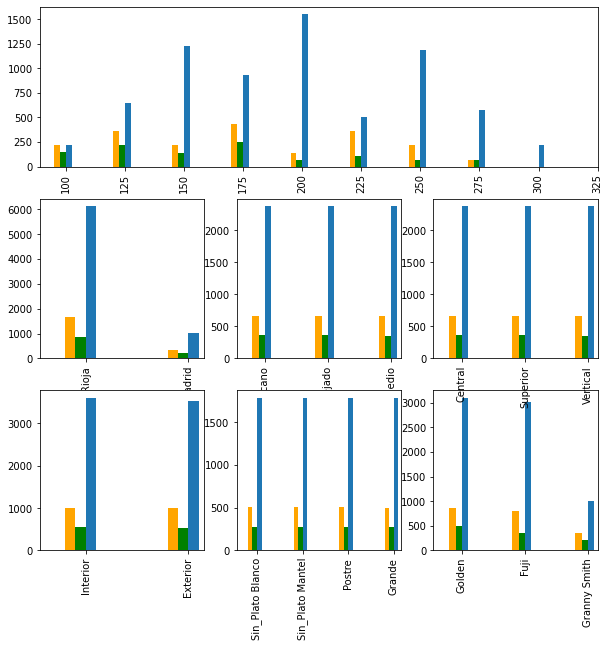

In [5]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

# Configurar el tamaño y diseño de los subplots
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (2, 2))
ax3 = plt.subplot2grid((3, 3), (1, 0))
ax4 = plt.subplot2grid((3, 3), (1, 1))
ax5 = plt.subplot2grid((3, 3), (1, 2))
ax6 = plt.subplot2grid((3, 3), (2, 0))
ax7 = plt.subplot2grid((3, 3), (2, 1))

#Size
df_tr_size.plot.bar(ax=ax1, position=0, width=0.1, label='train')
df_val_size.plot.bar(ax=ax1, position=1, width=0.1, label='test', color='green')
df_test_size.plot.bar(ax=ax1, position=2, width=0.1, label='val', color='orange')
ax1.set_xticks(range(len(list(df_tr_size.index))))
ax1.set_xticklabels(list(df_tr_size.index))

#Variety
df_tr_variety.plot.bar(ax=ax2, position=0, width=0.1, label='train')
df_val_variety.plot.bar(ax=ax2, position=1, width=0.1, label='test', color='green')
df_test_variety.plot.bar(ax=ax2, position=2, width=0.1, label='val', color='orange')

#Light
df_tr_light.plot.bar(ax=ax6, position=0, width=0.1, label='train')
df_val_light.plot.bar(ax=ax6, position=1, width=0.1, label='test', color='green')
df_test_light.plot.bar(ax=ax6, position=2, width=0.1, label='val', color='orange')

#Shot
df_tr_shot.plot.bar(ax=ax4, position=0, width=0.1, label='train')
df_val_shot.plot.bar(ax=ax4, position=1, width=0.1, label='test', color='green')
df_test_shot.plot.bar(ax=ax4, position=2, width=0.1, label='val', color='orange')

#Angle
df_tr_angle.plot.bar(ax=ax5, position=0, width=0.1, label='train')
df_val_angle.plot.bar(ax=ax5, position=1, width=0.1, label='test', color='green')
df_test_angle.plot.bar(ax=ax5, position=2, width=0.1, label='val', color='orange')

#location
df_tr_location.plot.bar(ax=ax3, position=0, width=0.1, label='train')
df_val_location.plot.bar(ax=ax3, position=1, width=0.1, label='test', color='green')
df_test_location.plot.bar(ax=ax3, position=2, width=0.1, label='val', color='orange')

#Plate
df_tr_plate.plot.bar(ax=ax7, position=0, width=0.1, label='train')
df_val_plate.plot.bar(ax=ax7, position=1, width=0.1, label='test', color='green')
df_test_plate.plot.bar(ax=ax7, position=2, width=0.1, label='val', color='orange')

plt.savefig('/srv/image-results/Set_distribution')
plt.show()
